In [65]:
library(tidyverse)
library(lemon)
library(cowplot)

devtools::load_all(".")


Attaching package: ‘lemon’

The following object is masked from ‘package:ychr’:

    %||%

The following object is masked from ‘package:purrr’:

    %||%


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading ychr


In [71]:
sim_traj <- function(p0, total_gen, Ne, reps) {
    p0 <- rep(0.05, reps)

    total_gen <- as.integer(100000 / 25)

    freqs <- c(p0, rep(0, total_gen - 1))

    p_trajectory <- matrix(c(p0, rep(0, reps * (total_gen - 1))),
                           nrow = total_gen,
                           byrow = TRUE)

    for (gen in seq_len(total_gen)[-1]) {
        p_next <- rbinom(reps, 2 * Ne, p_trajectory[gen - 1, ]) / (2 * Ne)
        p_trajectory[gen, ] <- p_next
    }

    p_traj <- as.data.frame(p_trajectory) %>%
        mutate(gen = 1:total_gen) %>%
        filter(gen < 500) %>%
        gather(allele, freq, -gen)

    p_traj
}

In [72]:
traj_y <- sim_traj(p0 = 0.05, total_gen = 10000, Ne = 500, reps = 100)
traj_mt <- sim_traj(p0 = 0.05, total_gen = 10000, Ne = 500, reps = 100)

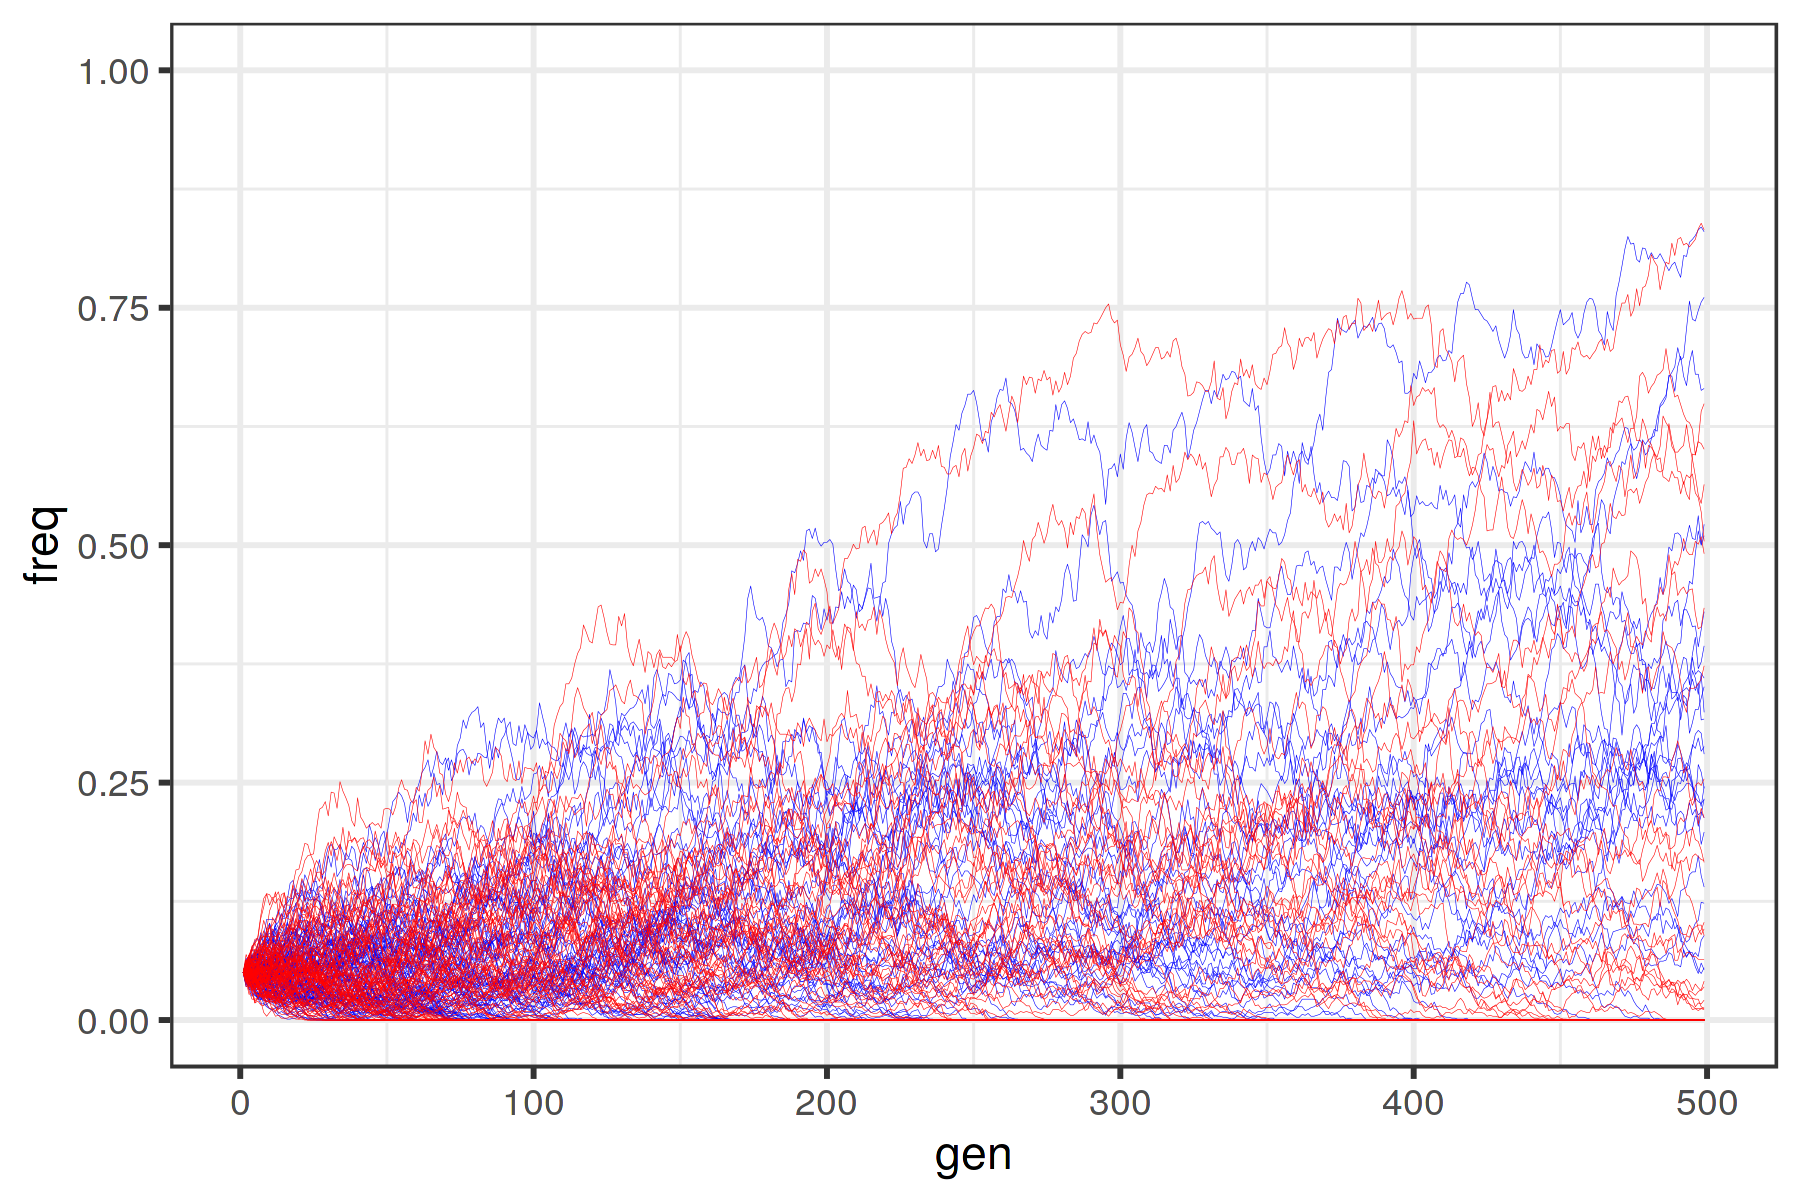

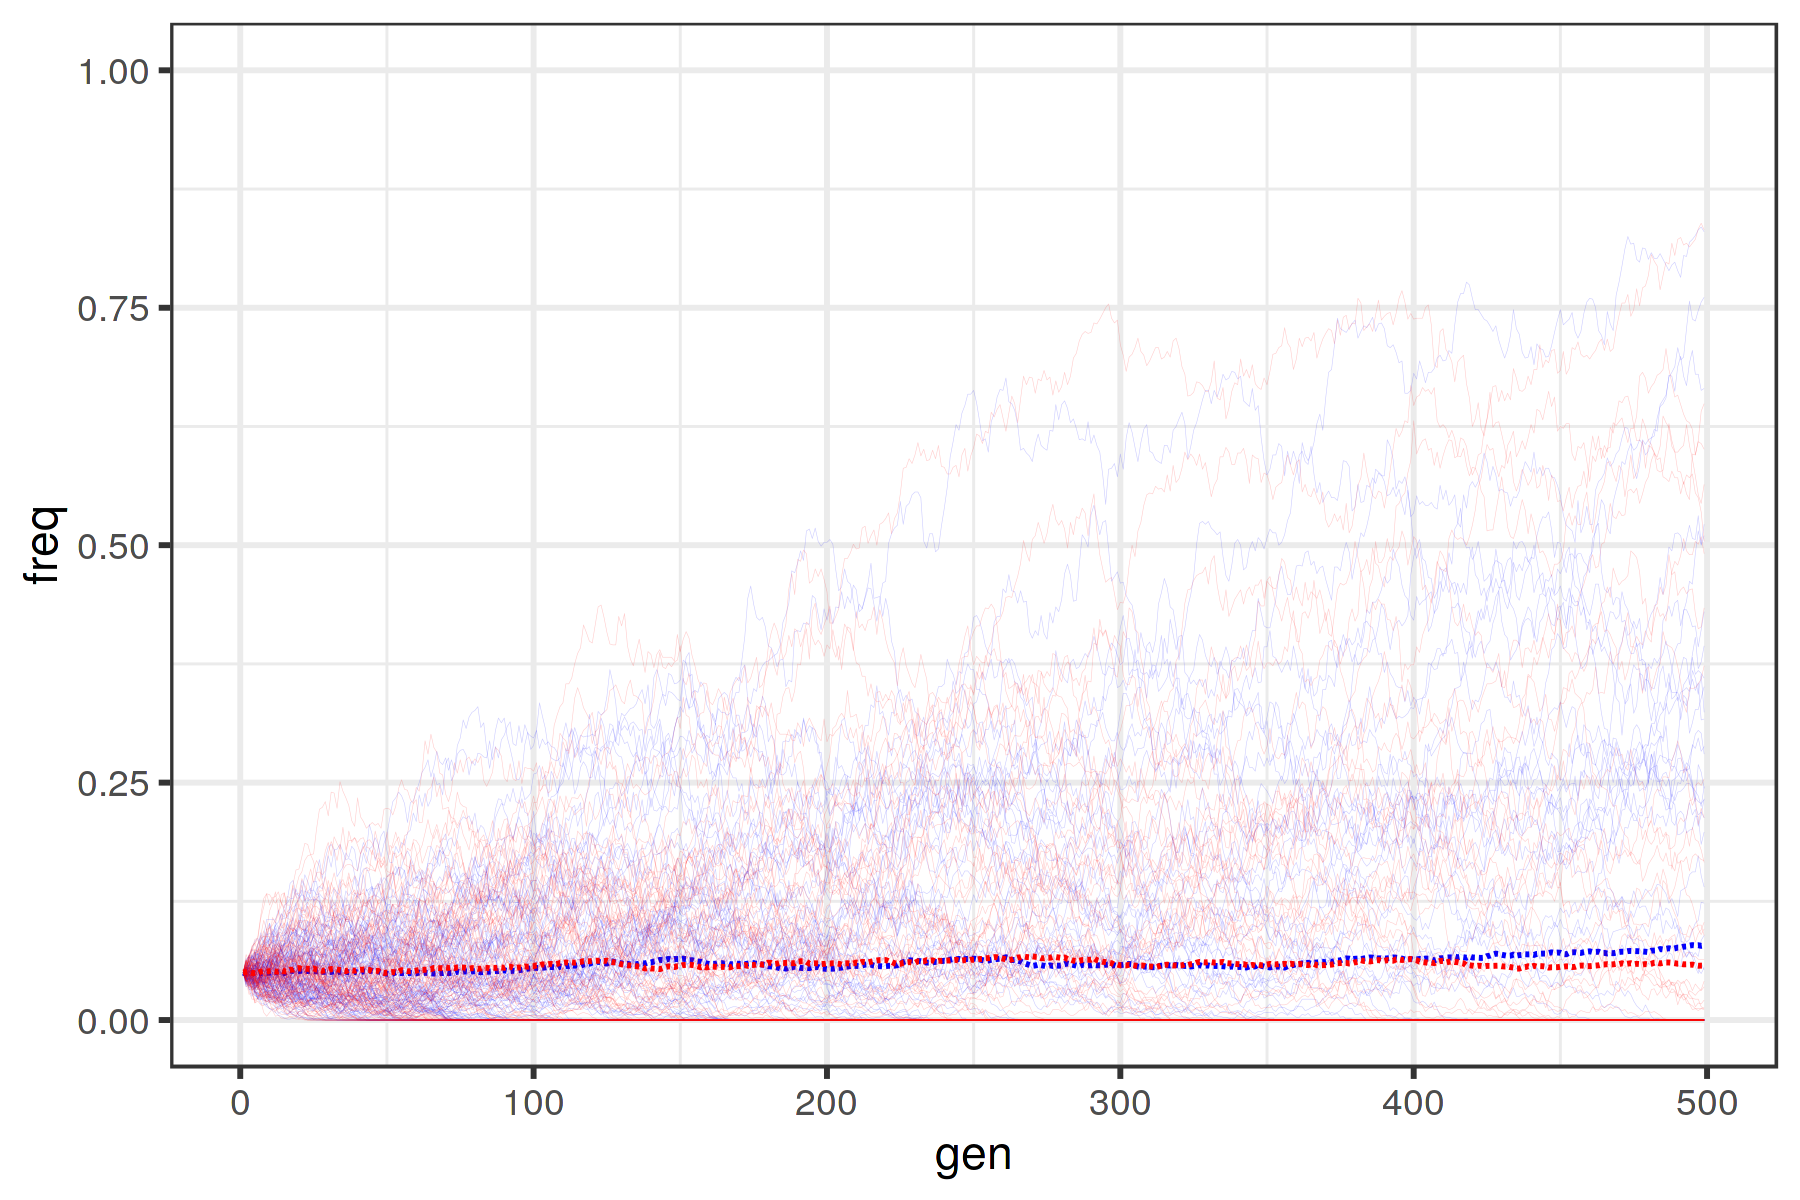

In [73]:
set_dim(6, 4)

ggplot() +
    geom_line(data = traj_y, aes(gen, freq, group = allele), size = 1/20, color = "blue") +
    geom_line(data = traj_mt, aes(gen, freq, group = allele), size = 1/20, color = "red") +
    theme_bw() +
    ylim(0, 1)

ggplot() +
    geom_line(data = traj_y, aes(gen, freq, group = allele), alpha = 1/5, size = 1/20, color = "blue") +
    geom_line(data = group_by(traj_y, gen) %>% summarise(freq = mean(freq)), aes(gen, freq), linetype = 2, color = "blue") +
    geom_line(data = traj_mt, aes(gen, freq, group = allele), alpha = 1/5, size = 1/20, color = "red") +
    geom_line(data = group_by(traj_mt, gen) %>% summarise(freq = mean(freq)), aes(gen, freq), linetype = 2, color = "red") +
    theme_bw() +
    ylim(0, 1)

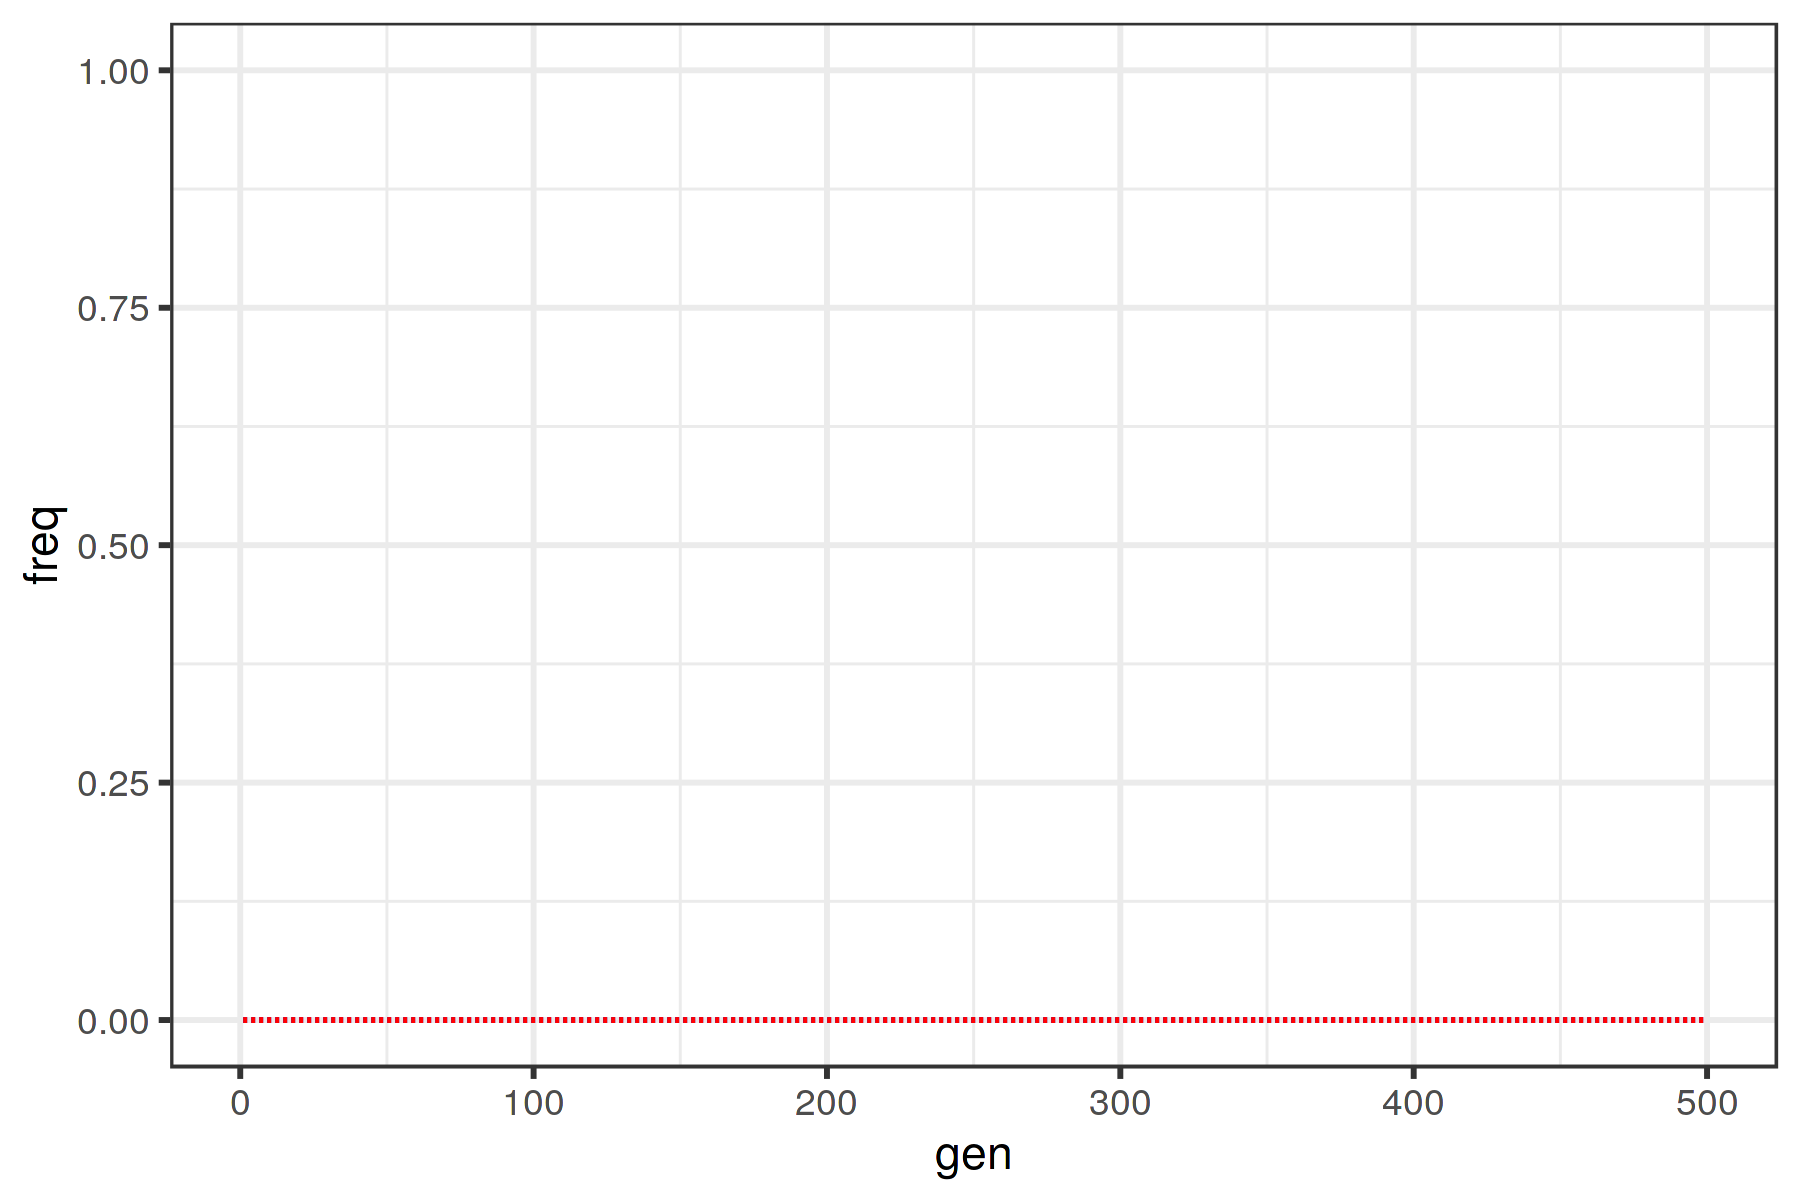

In [74]:
ggplot() +
    geom_line(data = group_by(traj_y, gen) %>% summarise(freq = mean(freq == 1)), aes(gen, freq), linetype = 2, color = "blue") +
    geom_line(data = group_by(traj_mt, gen) %>% summarise(freq = mean(freq == 1)), aes(gen, freq), linetype = 2, color = "red") +
    theme_bw() +
    ylim(0, 1)

In [43]:
p_traj %>%
    filter(gen == total_gen) %>%
    gather(replicate, freq, -gen) %>%
    summarise(prob = mean(freq == 1))

prob
<dbl>
0.043
